In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from  sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

label_encoder = LabelEncoder()


InputLayer = keras.layers.InputLayer()
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout
Dense = keras.layers.Dense
skencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [60]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_no_auto_dialer.csv')

df_to_dict = pd.DataFrame()
df= df.dropna(axis=0)

del df['direction'], df['locality_id'], df['call_type_id'], df['hold_secs'], df['ring_secs'], df['initial_position'] , df['carrier_id'], df['timestamp'], df['day'], df['month'], df['trunking_id'] 
mgmsales

NameError: name 'mgmsales' is not defined

In [26]:
df_to_ml = pd.get_dummies(df, prefix=None, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
df_to_ml['agent_id'] =label_encoder.fit_transform(df_to_ml['agent_id'])
#sk_data = skencoder.fit_transform(df)
#sk_data, sk_data.shape
#skencoder.get_feature_names_out()
df_to_ml

,agent_id,week_day,hour,minute,handling_time,queue_id_equipez4,queue_id_equipez5,queue_id_equipez6,queue_id_isdragons,queue_id_iseagles,...,queue_id_isnnadal,queue_id_isnrecuperacao,queue_id_isnxsell,queue_id_isphoenix,queue_id_issharks,queue_id_istigers,queue_id_iswolves,queue_id_mgmsales,queue_id_mgmsdr,queue_id_timec
0,0,4,20,2,78,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,21,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,21,2,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,21,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,21,2,23,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117583,97,1,21,4,47,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117584,23,1,21,4,70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117585,96,1,21,4,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
117586,121,1,21,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df_to_ml.iloc[:, 0:].values
x_train = df_to_ml.iloc[:, 0:].values[:, 4:5]

In [50]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_normalizada = normalizador.fit_transform(df_to_ml)

In [51]:
base_treinamento_normalizada.shape

(115277, 30)

In [52]:
previsores = []
tempo_real = []

In [31]:
for i in range(1, 115277):
    previsores.append(base_treinamento_normalizada[i-1:i, 0:30])
    tempo_real.append(base_treinamento_normalizada[i,4])

In [32]:
#previsores

In [33]:
previsores, tempo_real = np.array(previsores), np.array(tempo_real)
previsores= np.reshape(previsores, (previsores.shape[0], previsores.shape[1],30))

In [34]:
previsores.shape[0:]

(115276, 1, 30)

In [35]:
#pd.DataFrame(tempo_real)

In [36]:
regressor = keras.models.Sequential()
#camadas inicial
regressor.add(LSTM(units = 100, return_sequences = True, input_shape=(1,30)))
regressor.add(Dropout(0.3))     

#camadas
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))    

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))  

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3)) 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3)) 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3)) 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3)) 

#camadas finais
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3)) 

regressor.add(Dense(units = 1, activation = 'sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [37]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [38]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10 , verbose =1)
rlr = ReduceLROnPlateau(monitor = 'loss', factoe = 0.2, patience = 5, verbose = 1)
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', save_best_only = True)

In [39]:
regressor.fit(previsores, tempo_real, epochs = 10, batch_size = 300, callbacks = [es, rlr, mcp])

Epoch 1/10
385/385 [==============================] - 7s 8ms/step - loss: 0.1669 - accuracy: 0.1446 - lr: 0.0010
Epoch 2/10
385/385 [==============================] - 3s 9ms/step - loss: 0.0946 - accuracy: 0.1448 - lr: 0.0010
Epoch 3/10
385/385 [==============================] - 3s 8ms/step - loss: 0.0944 - accuracy: 0.1448 - lr: 0.0010
Epoch 4/10
385/385 [==============================] - 3s 8ms/step - loss: 0.0944 - accuracy: 0.1448 - lr: 0.0010
Epoch 5/10
385/385 [==============================] - 3s 8ms/step - loss: 0.0945 - accuracy: 0.1448 - lr: 0.0010
Epoch 6/10
385/385 [==============================] - 3s 8ms/step - loss: 0.0945 - accuracy: 0.1448 - lr: 0.0010
Epoch 7/10
385/385 [==============================] - 3s 8ms/step - loss: 0.0944 - accuracy: 0.1448 - lr: 0.0010
Epoch 8/10
379/385 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.1448
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
385/385 [===========================

In [40]:
data_to_predict = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/jupyter-studies/nn_models/nn_OHE/test_data.csv')

data_to_predict = data_to_predict.to_numpy()
data_to_predict
y_real = data_to_predict[:, 5:6]
y_real
normalizador_pred = MinMaxScaler(feature_range = (0,1))
normalizador_pred.fit_transform(data_to_predict[:, 5:6])

data_predict = []
data_predict_normalizada = normalizador.transform(data_to_predict)

data_predict_normalizada.shape

/opt/homebrew/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(9033, 30)

In [41]:
for i in range(1, 9033):
    data_predict.append(data_predict_normalizada[i-1:i, 0:30])
data_predict = np.array(data_predict)
data_predict= np.reshape(data_predict, (data_predict.shape[0], data_predict.shape[1],30)) # to help to know the shape
data_predict.shape

(9032, 1, 30)

In [42]:
results_real = regressor.predict(data_predict)

y_test = normalizador_pred.inverse_transform(results_real)
y_test

283/283 [==============================] - 1s 820us/step


array([[215.87094],
       [215.87094],
       [215.87094],
       ...,
       [215.87094],
       [215.87094],
       [215.87094]], dtype=float32)

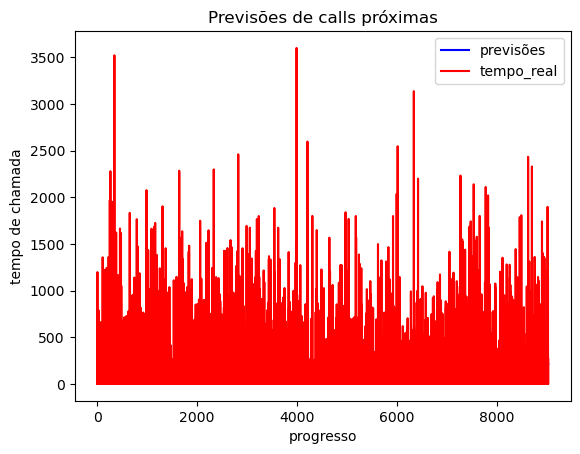

In [57]:
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'blue', label = 'previsões')
plt.plot(y_real, color = 'red', label = 'tempo_real')
plt.title('Previsões de calls próximas')
plt.xlabel('progresso')
plt.ylabel('tempo de chamada')
plt.legend()
plt.show()

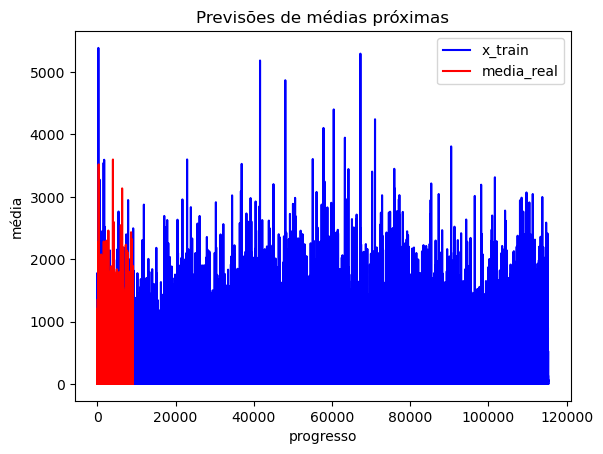

In [55]:
plt.plot(x_train, color = 'blue', label = 'x_train')
plt.plot(y_real, color = 'red', label = 'media_real')
plt.title('Previsões de médias próximas')
plt.xlabel('progresso')
plt.ylabel('média')
plt.legend()
plt.show()